In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=16,12
%matplotlib inline

# READ FILE

In [200]:
te=pd.read_csv('Ford_Stock.csv')

In [201]:
te["Date"]=pd.to_datetime(te.Date,format="%Y-%m-%d")
te.set_index('Date',inplace=True)
te.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


Text(0.5, 1.0, 'CLOSE GRAPH TESLA')

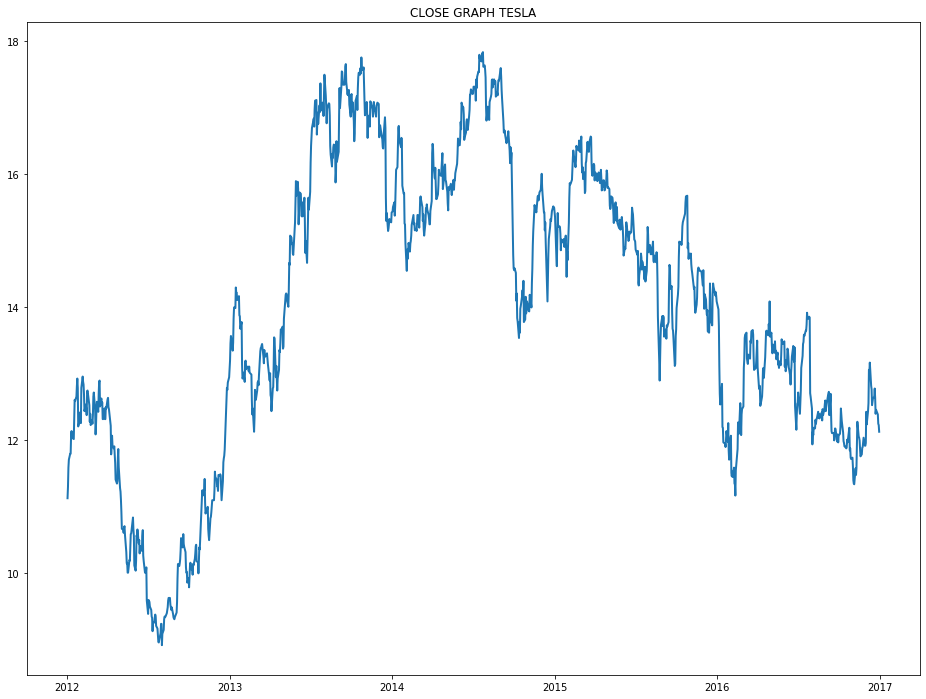

In [202]:
plt.figure(figsize=(16,12))
plt.plot(te.index,te['Close'],lw=2)
plt.title('CLOSE GRAPH TESLA')

In [203]:
ind=te.index
te=np.array(te['Close']).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
te=scaler.fit_transform(te)

train_data=te[:1000]
train_ind=ind[:1000]
test_data=te[940:]
test_ind=ind[940:]

In [204]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [205]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [206]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_22 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(x_train_data,y_train_data)

Epoch 1/1
940/940 [==============================] - 2s 2ms/step - loss: 0.0706


In [208]:
x_test=[]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test=np.array(x_test)

In [209]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [210]:
predict=model.predict(x_test)
predict=scaler.inverse_transform(predict)

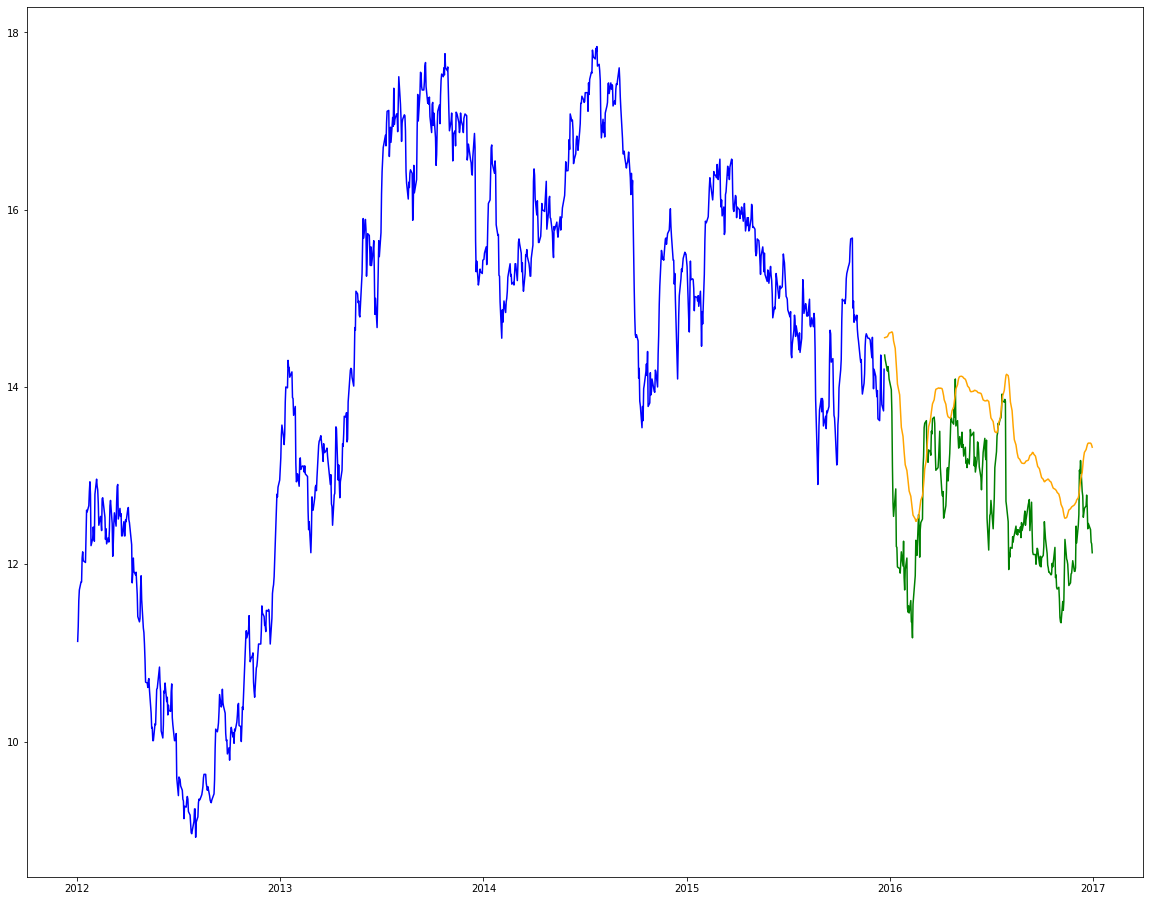

In [211]:
plt.figure(figsize=(20,16))
plt.plot(train_ind,scaler.inverse_transform(train_data),'blue')

plt.plot(test_ind[60:],scaler.inverse_transform(test_data)[60:],'green')

plt.plot(test_ind[60:],predict,'orange')